In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading Completed")

Loading Completed, Rose


In [3]:
## READ AND DISPLAY THE DATASET

In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


In [105]:
def get_data():
    file="datasets/global_food_prices.csv"
    data=pd.read_csv(file)
    food=data.copy()
    food.rename(columns={
        food.columns[0]:'Country_id',
        food.columns[1]:'Country_name', 
        food.columns[2]:'Locality_id',
        food.columns[3]:'Locality_name',
        food.columns[4]:'Market_id',
        food.columns[5]:'Market_name',
        food.columns[6]:'Commodity_purchase_id',
        food.columns[7]:'Commodity_purchased',
        food.columns[8]:'Currency_id',
        food.columns[9]:'Currency_name',
        food.columns[10]:'Market_type_id',
        food.columns[11]:'Market_type',
        food.columns[12]:'Measurement_id',
        food.columns[13]:'Unit_measurement',
        food.columns[14]:'Month',
        food.columns[15]:'Year',
        food.columns[16]:'Price',
        food.columns[17]:'Commodity_price_source'
    }, inplace=True)
    food.drop(food.columns[17], axis=1, inplace=True)
    items=[]
    for item_name in list(food.Commodity_purchased.str.split('-')):
        items.append(item_name[0])
    food.Commodity_purchased=items
    return food

In [107]:
food=get_data()

C:\Users\USER\AppData\Local\Temp\ipykernel_8244\1097734788.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(file)


In [14]:
food.tail()

,Country_id,Country_name,Locality_id,Locality_name,Market_id,Market_name,Commodity_purchase_id,Commodity_purchased,Currency_id,Currency_name,Market_type_id,Market_type,Measurement_id,Unit_measurement,Month,Year,Price,Commodity_price_source
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333,NaN
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000,NaN
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000,NaN
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000,NaN
2050637,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,887,Fish (kapenta) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,1200.0000,NaN


In [15]:
food.Country_name.unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
  

In [16]:
food.Commodity_purchased.unique()

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail',
       'Livestock (sheep, one-year-old alive female) - Retail',
       'Fuel (diesel) - Retail', 'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Wheat flour - Retail',
       'Rice - Retail', 'Beans (white) - Retail', 'Milk - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail',
       'Oil - Retail', 'Meat (beef) - Retail', 'Cheese (dry) - Retail',
       'Carrots - Retail', 'Onions - Retail', 'Bananas - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Fish (canned) - Retail', 'Apples - Retail', '

In [17]:
## CHECKING FOR DUPLICATES
food.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2050633    False
2050634    False
2050635    False
2050636    False
2050637    False
Length: 2050638, dtype: bool

In [18]:
food.duplicated().value_counts()

False    2050638
dtype: int64

In [19]:

food

,Country_id,Country_name,Locality_id,Locality_name,Market_id,Market_name,Commodity_purchase_id,Commodity_purchased,Currency_id,Currency_name,Market_type_id,Market_type,Measurement_id,Unit_measurement,Month,Year,Price
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0000
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0000
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0000
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0000
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [21]:
food

,Country_id,Country_name,Locality_id,Locality_name,Market_id,Market_name,Commodity_purchase_id,Commodity_purchased,Currency_id,Currency_name,Market_type_id,Market_type,Measurement_id,Unit_measurement,Month,Year,Price
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0000
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0000
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0000
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0000
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar),0.0,ZWL,15,Retail,5,KG,6,2021,233.3333
2050634,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste,0.0,ZWL,15,Retail,116,100 ML,6,2021,112.5000
2050635,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap,0.0,ZWL,15,Retail,5,KG,6,2021,114.0000
2050636,271.0,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap,0.0,ZWL,15,Retail,66,250 G,6,2021,59.5000


In [22]:
food['Locality_name'].isnull().values.any()

True

In [23]:
food['Locality_name'].isnull().sum()

611016

In [24]:
food['Locality_name'].fillna("None", inplace=True)

In [25]:
food['Locality_name'].isnull().values.any()

False

In [26]:
cty=food.groupby('Country_name')

In [27]:
cty_com=food.groupby('Commodity_purchased')

In [28]:
cty_com.sum()

,Country_id,Locality_id,Market_id,Commodity_purchase_id,Currency_id,Market_type_id,Measurement_id,Month,Year,Price
Commodity_purchased,,,,,,,,,,
Alcohol (spray),218246.0,2603353,1962312,805126,0.0,13755,105455,5569,1852740,1.556618e+06
Anchovies,157780.0,30542890,3348600,572355,0.0,12075,4025,4934,1626484,1.082594e+05
Apples,940129.0,11339250,9410423,1755360,0.0,76288,25440,32006,10263860,1.989444e+06
Apples (dried),110676.0,1348430,1221266,487616,0.0,12030,4010,5026,1618953,8.203096e+04
Apples (red),965459.0,606463887,5198316,845239,0.0,55305,18455,23538,7446209,2.392638e+06
...,...,...,...,...,...,...,...,...,...,...
Yam (white),22852.0,483906,1665237,441280,0.0,11820,3940,4741,1591749,2.823027e+05
Yam (yellow),1856.0,39315,140110,48832,0.0,960,320,351,129311,2.320225e+04
Yeast,31178.0,371993,175967,61570,0.0,1965,655,474,264096,2.611700e+05


In [29]:
cty.sum()

,Country_id,Locality_id,Market_id,Commodity_purchase_id,Currency_id,Market_type_id,Measurement_id,Month,Year,Price
Country_name,,,,,,,,,,
Afghanistan,15427.0,112249742,22782692,3174110,0.0,231405,259453,99522,31097652,3.575549e+08
Algeria,7172.0,673693,3258194,319069,0.0,26895,33933,12522,3613889,2.957767e+05
Angola,10176.0,519000,3291384,202491,0.0,19080,68790,8320,2561904,1.321561e+06
Argentina,11880.0,429462,2555372,93016,0.0,14294,5570,6355,1994799,2.551922e+04
Armenia,267800.0,9327511,31240784,4029636,0.0,309000,157418,130218,41561210,1.685953e+07
...,...,...,...,...,...,...,...,...,...,...
Venezuela,1578.0,0,7866,2838,0.0,90,336,27,12114,3.282600e+04
Viet Nam,72600.0,916867,752940,14300,0.0,3850,1375,1703,553687,2.073804e+06
Yemen,9900814.0,626121243,46172018,7300145,0.0,552090,682809,238694,74265280,1.061803e+08


In [62]:
cty2=food.groupby('Country_name')

In [71]:
line_data=cty2.get_group('Afghanistan').groupby('Commodity_purchased')['Commodity_purchased'].count()

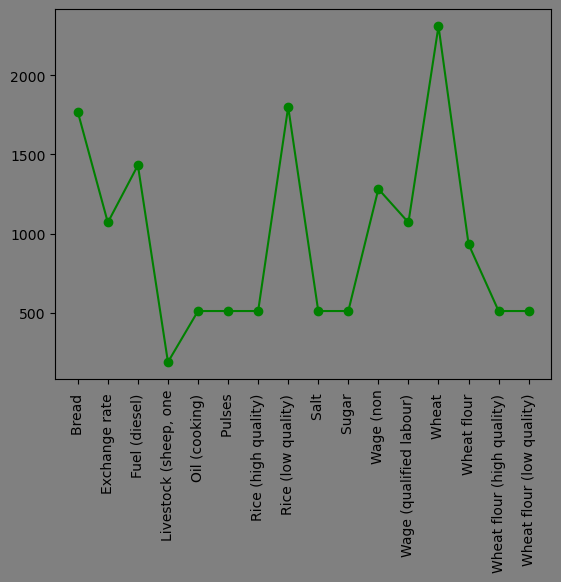

In [94]:
fig1,ax1=plt.subplots(facecolor='gray')
ax1.plot(line_data.index,line_data.values,'o-',color='green')
ax1.set_facecolor(color='gray')
plt.xticks(rotation=90)
plt.show()

In [34]:
food.columns

Index(['Country_id', 'Country_name', 'Locality_id', 'Locality_name',
       'Market_id', 'Market_name', 'Commodity_purchase_id',
       'Commodity_purchased', 'Currency_id', 'Currency_name', 'Market_type_id',
       'Market_type', 'Measurement_id', 'Unit_measurement', 'Month', 'Year',
       'Price'],
      dtype='object')

In [45]:
region=['Country_name', 'Market_name','Commodity_purchased',]

In [46]:
food[region]

,Country_name,Market_name,Commodity_purchased
0,Afghanistan,Fayzabad,Bread
1,Afghanistan,Fayzabad,Bread
2,Afghanistan,Fayzabad,Bread
3,Afghanistan,Fayzabad,Bread
4,Afghanistan,Fayzabad,Bread
...,...,...,...
2050633,Zimbabwe,Mbilashaba,Beans (sugar)
2050634,Zimbabwe,Mbilashaba,Toothpaste
2050635,Zimbabwe,Mbilashaba,Laundry soap
2050636,Zimbabwe,Mbilashaba,Handwash soap


<AxesSubplot:ylabel='None'>

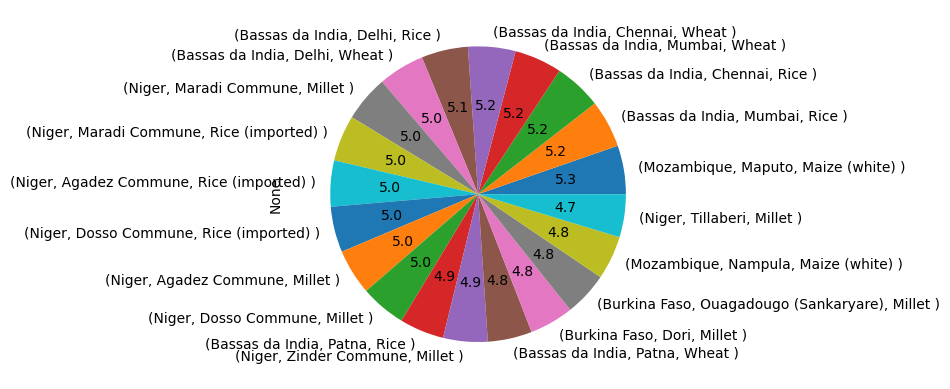

In [51]:
food[region].value_counts().head(20).plot(kind='pie',autopct='%.1f')

<AxesSubplot:xlabel='Country_name,Market_name,Commodity_purchased'>

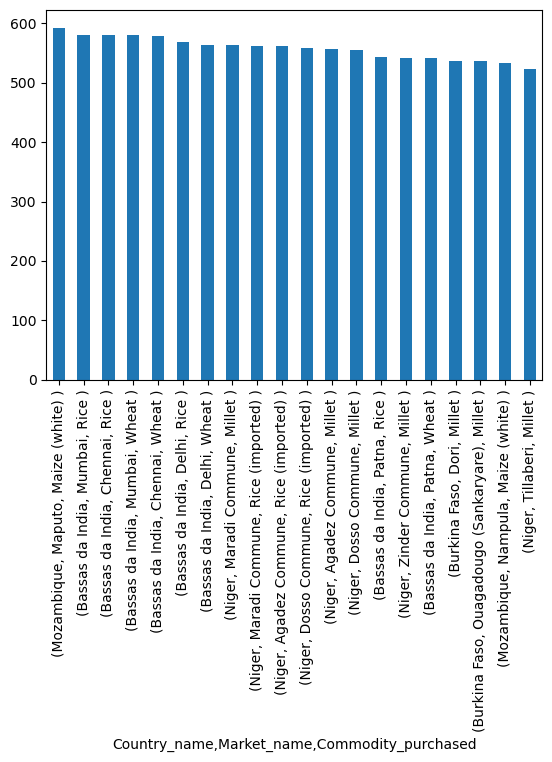

In [47]:
food[region].value_counts().head(20).plot.bar()

In [50]:
food['Price'].value_counts().head(20)

200.0     23571
500.0     22600
300.0     21174
400.0     18858
1000.0    18673
250.0     18153
100.0     15307
50.0      14465
350.0     13828
150.0     13606
2000.0    13580
600.0     11953
1500.0    11480
450.0     10703
40.0       8995
30.0       8612
20.0       8536
2500.0     7925
3000.0     7799
700.0      7714
Name: Price, dtype: int64

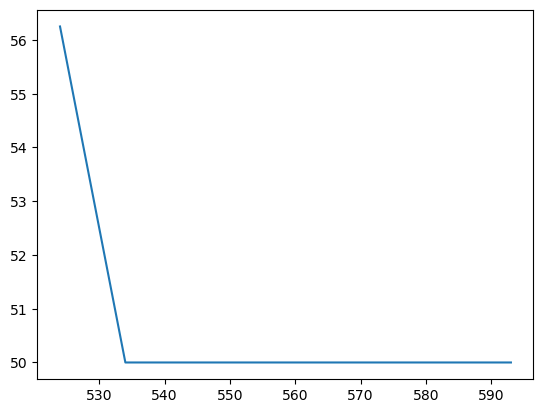

In [55]:
x=food[region].value_counts().head(20)
y=food['Price'].head(20)
fig,ax1=plt.subplots()
ax1.plot(x,y)

<AxesSubplot:>

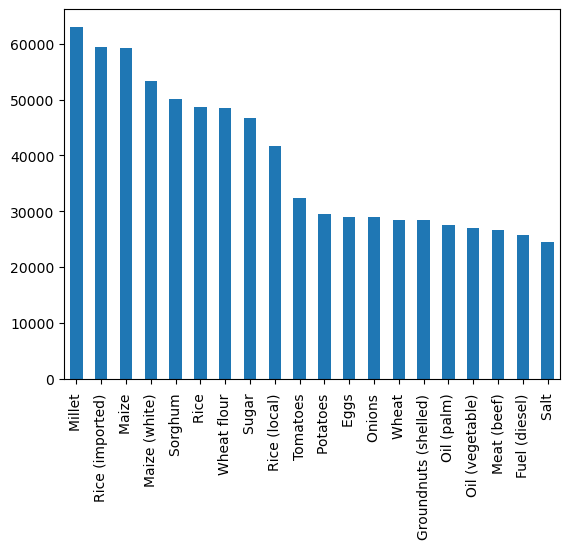

In [43]:
food[region].Commodity_purchased.value_counts().head(20).plot.bar()


<AxesSubplot:xlabel='Country Name', ylabel='Total Commodity Purchased'>

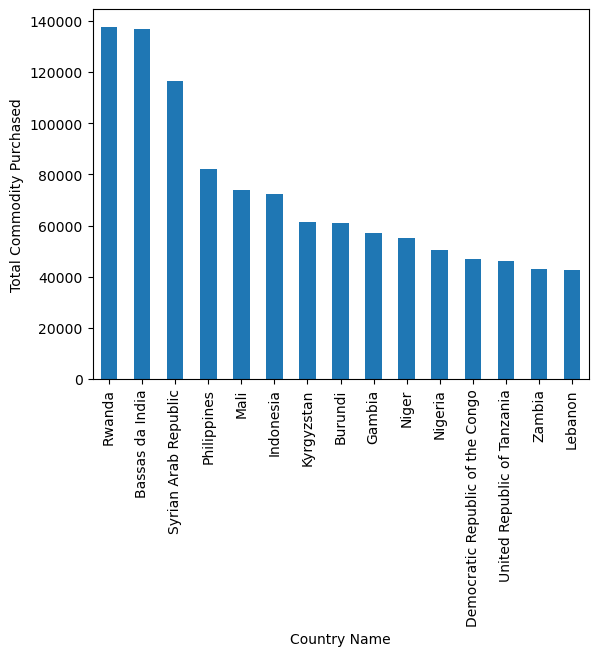

In [101]:
a=food.groupby('Country_name')['Commodity_purchased'].count().sort_values(ascending=False).head(15)
a.plot.bar(xlabel='Country Name',ylabel='Total Commodity Purchased')

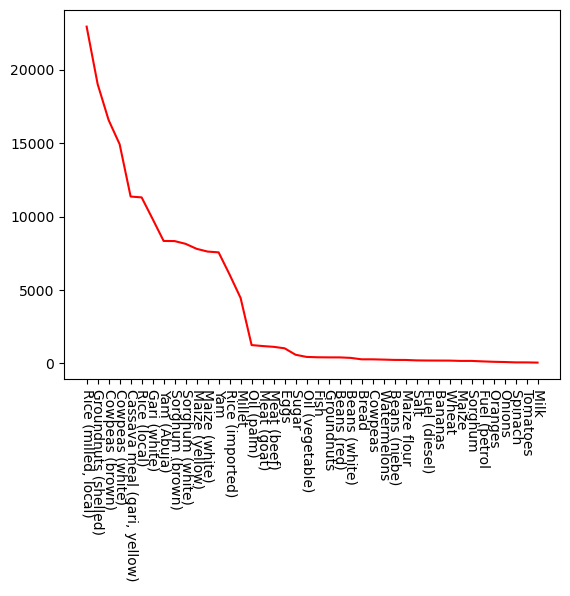

In [165]:
line_data1=food.groupby('Country_name').get_group('Nigeria')[['Commodity_purchased','Price']].groupby('Commodity_purchased')
fig,ax1=plt.subplots()
ax1.plot(line_data1.mean().sort_values(by='Price',ascending=False),color='r')
plt.xticks(rotation=270)

plt.show()

<AxesSubplot:xlabel='Commodity_purchased'>

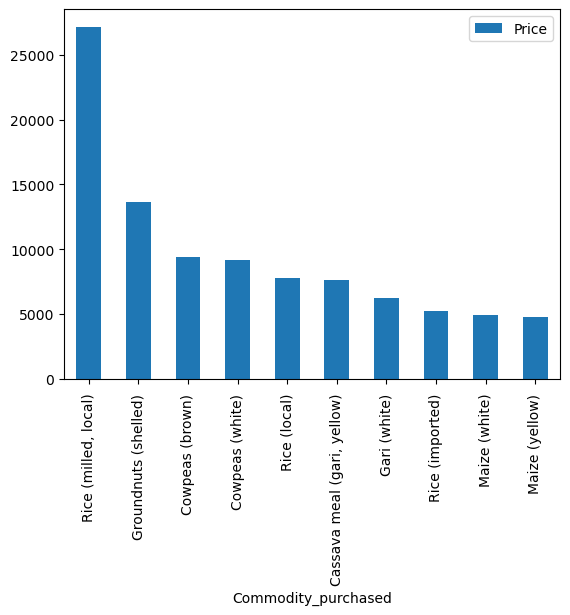

In [139]:
line_data1=food.groupby(['Country_name','Year']).get_group(('Nigeria',2019))[['Commodity_purchased','Price']].groupby('Commodity_purchased').mean().sort_values(by='Price',ascending=False).head(10)
line_data1.plot(kind='bar')